<a href="https://colab.research.google.com/github/KunalDM1999/Task-5-Decision-Trees-and-Random-Forests/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**
**importing all imports**  

In [24]:
# Core libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score


# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Cross-validation
from sklearn.model_selection import cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



**data loading**

In [25]:
data = pd.read_csv('/content/train (2).csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Train test spliting**

In [26]:
# Features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

# Split data into train and test (70-30), stratified to keep class proportions
# random_state fixed to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


# **model bulding**
  **Train Decision Tree**
1. **model trening**
2. **model evluation**
3. **Visualize decision tree**

Train Accuracy: 1.0
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       350
           3       1.00      1.00      1.00       350

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Test Accuracy: 0.8166666666666667
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       150
           1       0.79      0.75      0.77       150
           2       0.74      0.74      0.74       150
           3       0.84      0.89      0.86       150

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



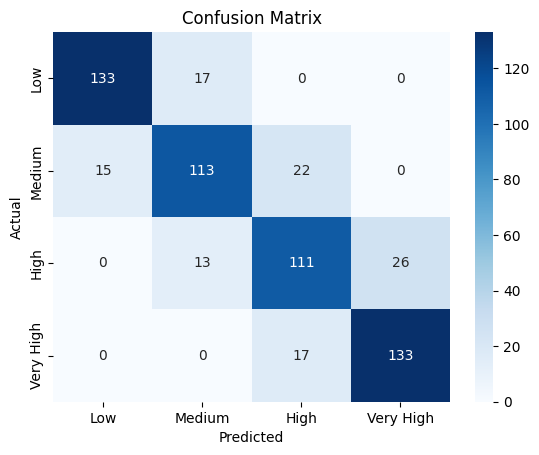

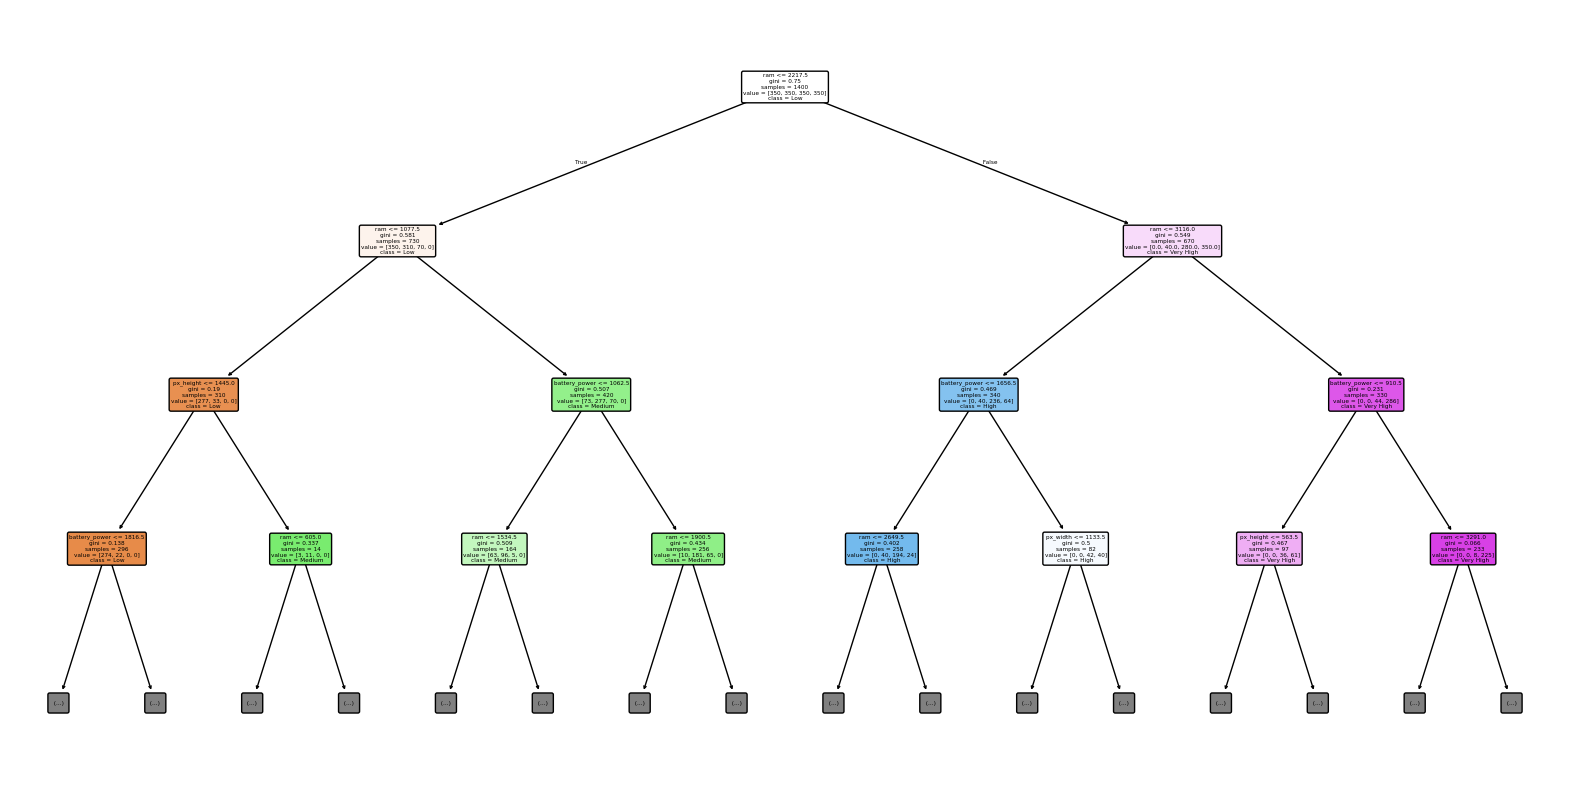

In [27]:

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Evaluate and print metrics for train set
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluate and print metrics for test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix plot function (simplified)
def plot_conf_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for test set
plot_conf_matrix(y_test, y_test_pred, classes=['Low', 'Medium', 'High', 'Very High'])

# Visualize decision tree (limited depth for clarity)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Low', 'Medium', 'High', 'Very High'], max_depth=3, rounded=True)
plt.show()

**Overfitting reduction**

In [28]:
# Try different max_depth values and check train/test accuracy
depths = [2,3, 4,5, 6,7, 8,9, 10, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    print(f"max_depth={depth}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")


max_depth=2: Train Acc = 0.7686, Test Acc = 0.7367
max_depth=3: Train Acc = 0.7743, Test Acc = 0.7400
max_depth=4: Train Acc = 0.8443, Test Acc = 0.7900
max_depth=5: Train Acc = 0.8893, Test Acc = 0.8167
max_depth=6: Train Acc = 0.9286, Test Acc = 0.8283
max_depth=7: Train Acc = 0.9543, Test Acc = 0.8267
max_depth=8: Train Acc = 0.9686, Test Acc = 0.8317
max_depth=9: Train Acc = 0.9843, Test Acc = 0.8433
max_depth=10: Train Acc = 0.9929, Test Acc = 0.8067
max_depth=None: Train Acc = 1.0000, Test Acc = 0.8167


**finding maximum depth**

In [29]:
# Try different max_depth values and check train/test accuracy
depths = [5, 6,7, 8,9]  # None means unlimited depth

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=15,
    min_samples_leaf=9,
    random_state=42)
    dt.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt.predict(X_train))
    test_acc = accuracy_score(y_test, dt.predict(X_test))

    print(f"max_depth={depth}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

max_depth=5: Train Acc = 0.8807, Test Acc = 0.8233
max_depth=6: Train Acc = 0.8986, Test Acc = 0.8350
max_depth=7: Train Acc = 0.9029, Test Acc = 0.8433
max_depth=8: Train Acc = 0.9071, Test Acc = 0.8483
max_depth=9: Train Acc = 0.9071, Test Acc = 0.8483


  **Train Random Forest**
1. **model trening**
2. **model evluation**

 Random Forest - Train Accuracy: 1.0
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       350
           3       1.00      1.00      1.00       350

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

 Random Forest - Test Accuracy: 0.8716666666666667
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       150
           1       0.83      0.88      0.85       150
           2       0.82      0.73      0.77       150
           3       0.87      0.92      0.90       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0

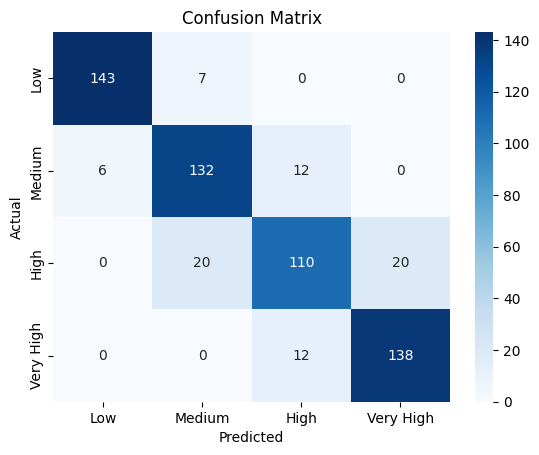

In [30]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Evaluate and print metrics for train set
print(" Random Forest - Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred_rf))

# Evaluate and print metrics for test set
print(" Random Forest - Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

# Confusion matrix plot function (simplified)
def plot_conf_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for test set
plot_conf_matrix(y_test, y_test_pred_rf, classes=['Low', 'Medium', 'High', 'Very High'])


# **Extract feature importances**
**for DecisionTreeClassifier**

In [31]:

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

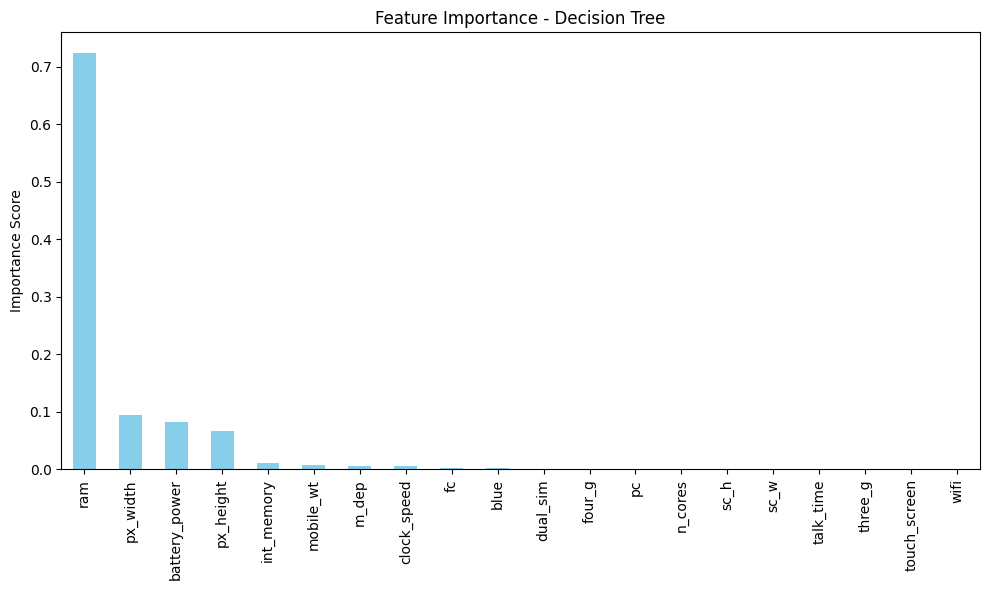

In [32]:
# Get importances
importances_dt = pd.Series(dt.feature_importances_, index=X_train.columns)
importances_dt = importances_dt.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_dt.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Decision Tree")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**for RandomForestClassifier**

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

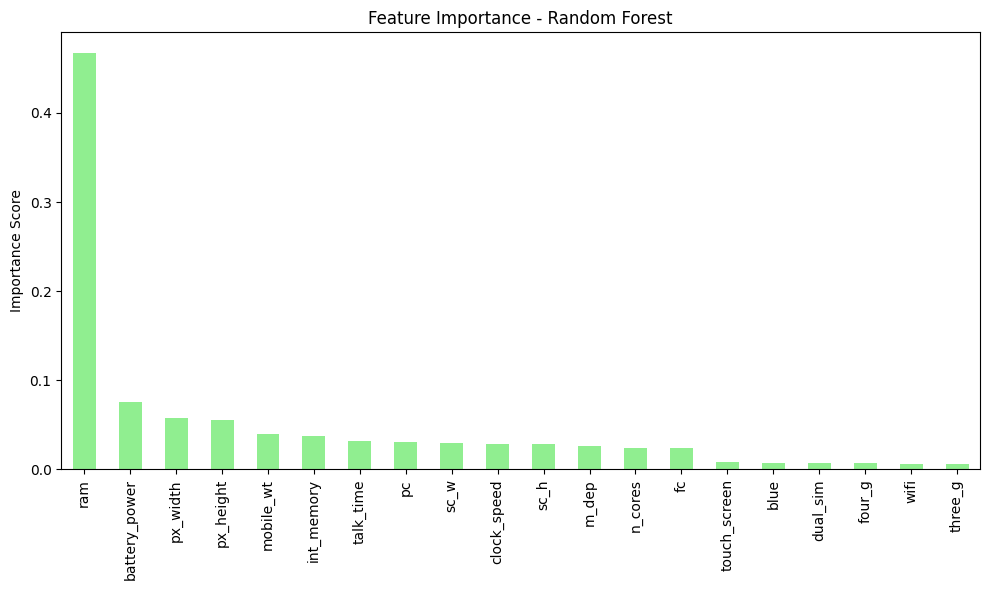

In [34]:
# Get importances
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_rf.plot(kind='bar', color='lightgreen')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [35]:
# Extract feature importances
dt_importances = dt.feature_importances_
rf_importances = rf.feature_importances_

# Feature names
features = X_train.columns

# Create DataFrames
dt_df = pd.DataFrame({'Feature': features, 'DT_Importance': dt_importances})
rf_df = pd.DataFrame({'Feature': features, 'RF_Importance': rf_importances})

# Merge both
combined_df = pd.merge(dt_df, rf_df, on='Feature')

# Sort by Random Forest importance or average of both
combined_df['Avg_Importance'] = (combined_df['DT_Importance'] + combined_df['RF_Importance']) / 2
combined_df = combined_df.sort_values(by='Avg_Importance', ascending=False)

# Display
top10_features = combined_df.head(20).reset_index(drop=True)
print(top10_features[['Feature', 'DT_Importance', 'RF_Importance']])


          Feature  DT_Importance  RF_Importance
0             ram       0.724041       0.467112
1   battery_power       0.082202       0.076026
2        px_width       0.093777       0.057708
3       px_height       0.067213       0.055458
4      int_memory       0.010772       0.037880
5       mobile_wt       0.007453       0.039427
6     clock_speed       0.005135       0.028856
7       talk_time       0.000000       0.032190
8           m_dep       0.005498       0.026579
9              pc       0.000000       0.030592
10           sc_w       0.000000       0.029553
11           sc_h       0.000000       0.028498
12             fc       0.002113       0.023903
13        n_cores       0.000000       0.024210
14           blue       0.001797       0.007236
15   touch_screen       0.000000       0.008145
16       dual_sim       0.000000       0.007207
17         four_g       0.000000       0.007192
18           wifi       0.000000       0.006383
19        three_g       0.000000       0

# **fetures reduction**

In [36]:
low_importance_features = combined_df[combined_df['Avg_Importance'] < 0.02]['Feature'].tolist()
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)


**trining both models on reduced fetures**

In [37]:
# Decision Tree on reduced features
dt_reduced = DecisionTreeClassifier(random_state=42)
dt_reduced.fit(X_train_reduced, y_train)

y_train_pred_dt_reduced = dt_reduced.predict(X_train_reduced)
y_test_pred_dt_reduced = dt_reduced.predict(X_test_reduced)

print(" Decision Tree on Reduced Features")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt_reduced))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt_reduced))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_dt_reduced))

# Random Forest on reduced features
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

y_train_pred_rf_reduced = rf_reduced.predict(X_train_reduced)
y_test_pred_rf_reduced = rf_reduced.predict(X_test_reduced)

print("\n Random Forest on Reduced Features")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf_reduced))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf_reduced))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred_rf_reduced))


 Decision Tree on Reduced Features
Train Accuracy: 1.0
Test Accuracy: 0.845
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       150
           1       0.84      0.83      0.84       150
           2       0.77      0.75      0.76       150
           3       0.84      0.87      0.86       150

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600


 Random Forest on Reduced Features
Train Accuracy: 1.0
Test Accuracy: 0.9066666666666666
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       150
           1       0.88      0.89      0.88       150
           2       0.84      0.86      0.85       150
           3       0.94      0.92      0.93       150

    accuracy                           0.91       600
   macro av

**Visualization using confusion matrix**

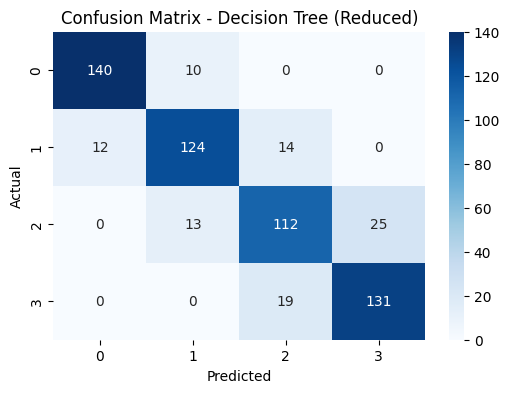

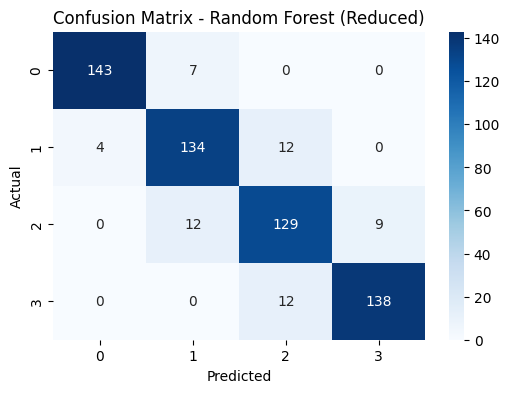

In [38]:

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot for Decision Tree
plot_conf_matrix(y_test, y_test_pred_dt_reduced, "Decision Tree (Reduced)")

# Plot for Random Forest
plot_conf_matrix(y_test, y_test_pred_rf_reduced, "Random Forest (Reduced)")


# **cross-validation**

**finding best parameters using RandomizedSearchCV for both models**

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# Randomized parameter grid for Decision Tree
dt_param_dist = {
    'max_depth': list(range(3, 20)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5))
}

# Randomized parameter grid for Random Forest
rf_param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': list(range(5, 20)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5))
}

# Decision Tree random search
dt_random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=dt_param_dist,
    n_iter=20, cv=5, n_jobs=-1, random_state=42
)

# Random Forest random search
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20, cv=5, n_jobs=-1, random_state=42
)

# Fit to reduced training data
dt_random_search.fit(X_train_reduced, y_train)
rf_random_search.fit(X_train_reduced, y_train)

# Display best parameters
print(" Best Decision Tree Parameters:", dt_random_search.best_params_)
print(" Best Random Forest Parameters:", rf_random_search.best_params_)


 Best Decision Tree Parameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 17}
 Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 14}


**model evluation with best hyperparameters**

Decision Tree - Train Accuracy: 0.9771, Test Accuracy: 0.8567
Random Forest - Train Accuracy: 0.9986, Test Accuracy: 0.9067


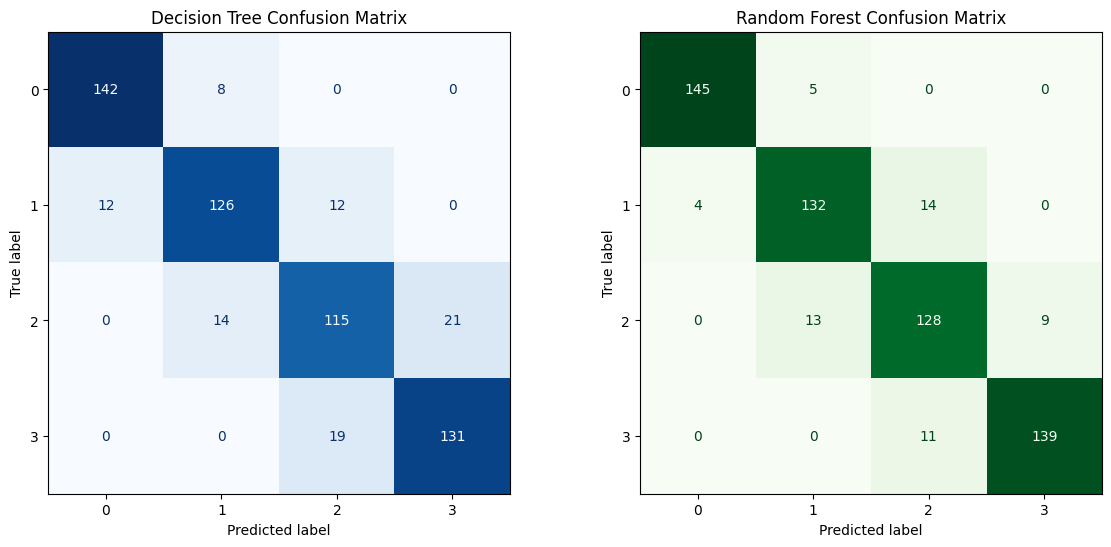

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Best hyperparameters from your result
dt_params = {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 17}
rf_params = {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 14}
# Train Decision Tree with best params
dt_best = DecisionTreeClassifier(**dt_params, random_state=42)
dt_best.fit(X_train_reduced, y_train)

# Predictions
dt_train_preds = dt_best.predict(X_train_reduced)
dt_test_preds = dt_best.predict(X_test_reduced)

# Accuracy scores for Decision Tree
dt_train_acc = accuracy_score(y_train, dt_train_preds)
dt_test_acc = accuracy_score(y_test, dt_test_preds)

# Train Random Forest with best params
rf_best = RandomForestClassifier(**rf_params, random_state=42)
rf_best.fit(X_train_reduced, y_train)

# Predictions
rf_train_preds = rf_best.predict(X_train_reduced)
rf_test_preds = rf_best.predict(X_test_reduced)

# Accuracy scores for Random Forest
rf_train_acc = accuracy_score(y_train, rf_train_preds)
rf_test_acc = accuracy_score(y_test, rf_test_preds)

print(f"Decision Tree - Train Accuracy: {dt_train_acc:.4f}, Test Accuracy: {dt_test_acc:.4f}")
print(f"Random Forest - Train Accuracy: {rf_train_acc:.4f}, Test Accuracy: {rf_test_acc:.4f}")

# Plot confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DT Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_test_preds)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_best.classes_)
disp_dt.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Decision Tree Confusion Matrix")

# RF Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_test_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_best.classes_)
disp_rf.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()


**cross-validation_scores on  Accuracy for both models with best hyperparameters**

In [41]:
from sklearn.model_selection import cross_val_score

# Best parameters from your tuning
dt_params = {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 17}
rf_params = {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 14}

# Initialize models with best params
dt_model = DecisionTreeClassifier(**dt_params, random_state=42)
rf_model = RandomForestClassifier(**rf_params, random_state=42)

# Perform 5-fold cross-validation on training data with reduced features
dt_cv_scores = cross_val_score(dt_model, X_train_reduced, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_train_reduced, y_train, cv=5, scoring='accuracy')

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Decision Tree CV Accuracy: 0.8400 ± 0.0314
Random Forest CV Accuracy: 0.8914 ± 0.0144
